# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [3]:
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Lese die SQLite-Datenbanken ein
weather = pd.read_sql_query("SELECT * FROM weather", "sqlite:///weather.sqlite")
speed = pd.read_sql_query("SELECT * FROM speed", "sqlite:///speed.sqlite")

### Look at the first rows

In [7]:
weather.head(10)

,date,prcp
0,2017-01-01 00:00:00.000000,3.2
1,2017-01-02 00:00:00.000000,0.4
2,2017-01-03 00:00:00.000000,0.5
3,2017-01-04 00:00:00.000000,5.4
4,2017-01-05 00:00:00.000000,0.0
5,2017-01-06 00:00:00.000000,0.0
6,2017-01-07 00:00:00.000000,2.1
7,2017-01-08 00:00:00.000000,0.1
8,2017-01-09 00:00:00.000000,8.6
9,2017-01-10 00:00:00.000000,1.0


### Look at the first rows

In [8]:
speed.head(10)

,date,ueberschreitung
0,2017-01-01 00:00:00.000000,13.0
1,2017-01-01 00:00:00.000000,16.0
2,2017-01-01 00:00:00.000000,6.0
3,2017-01-01 00:00:00.000000,9.0
4,2017-01-01 00:00:00.000000,10.0
5,2017-01-01 00:00:00.000000,18.0
6,2017-01-01 00:00:00.000000,10.0
7,2017-01-01 00:00:00.000000,10.0
8,2017-01-01 00:00:00.000000,6.0
9,2017-01-01 00:00:00.000000,14.0


### Data exploration
Print some basic information about the data.

In [42]:
weather.info()

weather['prcp'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1826 non-null   object 
 1   prcp    1826 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


array([3.200e+00, 4.000e-01, 5.000e-01, 5.400e+00, 0.000e+00, 2.100e+00,
       1.000e-01, 8.600e+00, 1.000e+00, 3.000e+00, 1.100e+01, 3.900e+00,
       4.900e+00, 2.800e+00, 2.200e+00, 1.500e+00, 4.300e+00, 2.700e+00,
       3.400e+00, 8.000e-01, 1.200e+00, 6.600e+00, 7.600e+00, 3.700e+00,
       6.900e+00, 7.100e+00, 2.000e-01, 7.400e+00, 5.000e+00, 2.230e+01,
       2.300e+00, 1.800e+01, 3.000e-01, 9.000e-01, 8.000e+00, 1.100e+00,
       6.000e-01, 7.300e+00, 8.400e+00, 6.400e+00, 5.200e+00, 1.400e+00,
       4.100e+00, 5.800e+00, 2.600e+00, 7.000e-01, 2.500e+00, 6.000e+00,
       5.100e+00, 1.460e+01, 9.200e+00, 9.100e+00, 1.800e+00, 4.500e+00,
       9.500e+01, 1.980e+01, 8.900e+00, 1.220e+01, 3.600e+00, 3.800e+00,
       9.000e+00, 1.960e+01, 1.700e+01, 1.700e+00, 2.570e+01, 2.900e+00,
       4.000e+00, 1.600e+00, 1.030e+01, 3.300e+00, 2.000e+00, 8.100e+00,
       6.500e+00, 1.160e+01, 4.700e+00, 6.100e+00, 1.290e+01, 2.400e+00,
       9.800e+00, 1.300e+00, 5.900e+00, 6.300e+00, 

In [43]:
weather.info()

weather['prcp'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1826 non-null   object 
 1   prcp    1826 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


array([3.200e+00, 4.000e-01, 5.000e-01, 5.400e+00, 0.000e+00, 2.100e+00,
       1.000e-01, 8.600e+00, 1.000e+00, 3.000e+00, 1.100e+01, 3.900e+00,
       4.900e+00, 2.800e+00, 2.200e+00, 1.500e+00, 4.300e+00, 2.700e+00,
       3.400e+00, 8.000e-01, 1.200e+00, 6.600e+00, 7.600e+00, 3.700e+00,
       6.900e+00, 7.100e+00, 2.000e-01, 7.400e+00, 5.000e+00, 2.230e+01,
       2.300e+00, 1.800e+01, 3.000e-01, 9.000e-01, 8.000e+00, 1.100e+00,
       6.000e-01, 7.300e+00, 8.400e+00, 6.400e+00, 5.200e+00, 1.400e+00,
       4.100e+00, 5.800e+00, 2.600e+00, 7.000e-01, 2.500e+00, 6.000e+00,
       5.100e+00, 1.460e+01, 9.200e+00, 9.100e+00, 1.800e+00, 4.500e+00,
       9.500e+01, 1.980e+01, 8.900e+00, 1.220e+01, 3.600e+00, 3.800e+00,
       9.000e+00, 1.960e+01, 1.700e+01, 1.700e+00, 2.570e+01, 2.900e+00,
       4.000e+00, 1.600e+00, 1.030e+01, 3.300e+00, 2.000e+00, 8.100e+00,
       6.500e+00, 1.160e+01, 4.700e+00, 6.100e+00, 1.290e+01, 2.400e+00,
       9.800e+00, 1.300e+00, 5.900e+00, 6.300e+00, 

### Data Manipulation

Merge the data based on the date

In [44]:
merged_data = pd.merge(weather, speed, on='date', how='inner')

Calculation of the total speed limit violation amount per day

In [45]:
daily_total_overspeed = merged_data.groupby('date')['ueberschreitung'].sum()

### Visualization

Plot of total total speed limit violation per day

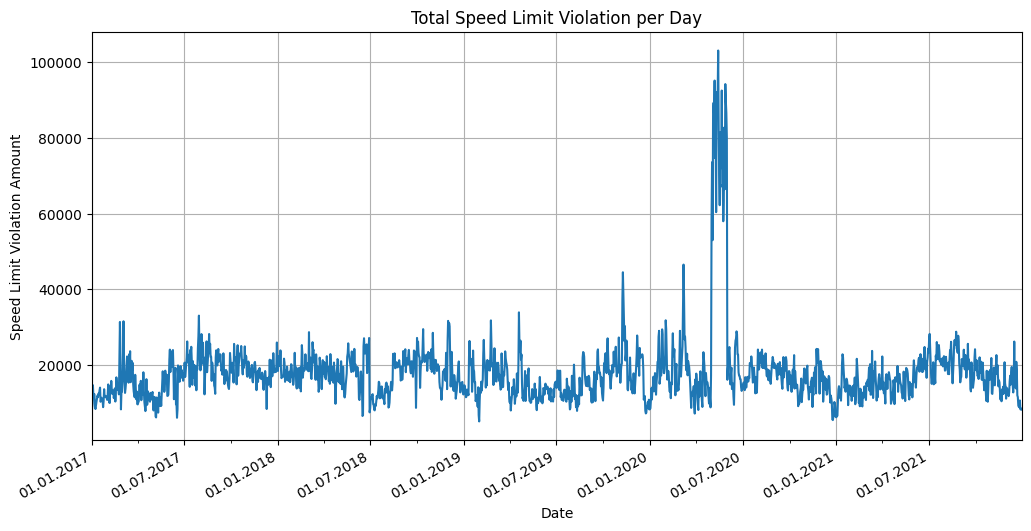

In [49]:
plt.figure(figsize=(12, 6))

# Convert the index to datetime if needed
daily_total_overspeed.index = pd.to_datetime(daily_total_overspeed.index)

daily_total_overspeed.plot()
plt.title('Total Speed Limit Violation per Day')
plt.xlabel('Date')
plt.ylabel('Speed Limit Violation Amount')
plt.grid(True)

# Set the locator and formatter for x-axis tick labels
locator = mdates.MonthLocator(interval=6)
formatter = mdates.DateFormatter('%d.%m.%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels

plt.show()

Plot of precipitation per day

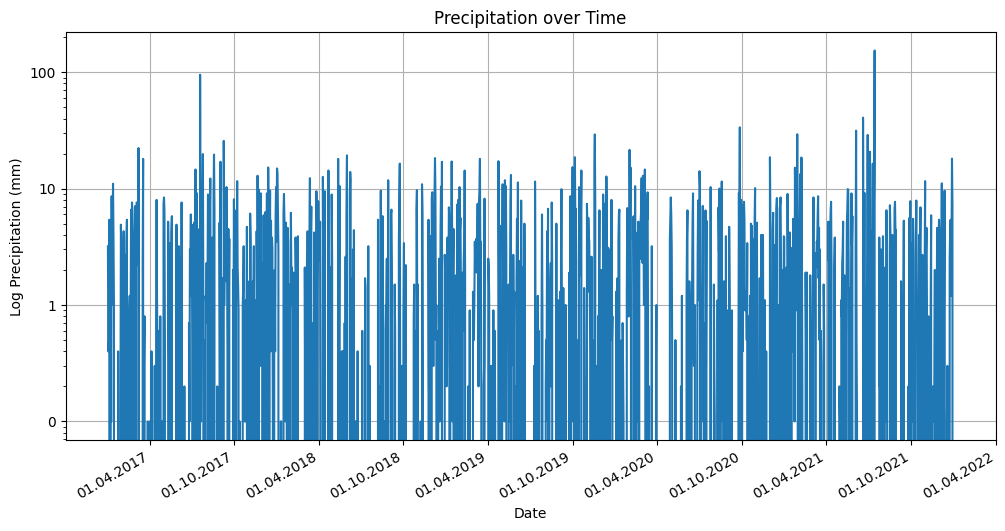

In [47]:
plt.figure(figsize=(12, 6))
weather['date'] = pd.to_datetime(weather['date'])  # Convert date format

plt.plot(weather['date'], weather['prcp'])
locator = mdates.MonthLocator(interval=6)  # Every 6 months
plt.gca().xaxis.set_major_locator(locator)

# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels

plt.yscale('log')  # Set y-axis scale to logarithmic

# Customize y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(ticker.NullFormatter())

# Set y-axis label
plt.ylabel('Log Precipitation (mm)')

plt.title('Precipitation over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


Correlation calculation

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['prcp'], merged_data['ueberschreitung'])
plt.title('Correlation: Speed Limit Violation vs. precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Speed Limit Violation')
plt.grid(True)

# Set x-axis scale to logarithmic
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())

plt.show()